# Import and Instal Dependencies

In [1]:
# !pip install seaborn

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2024-06-18 10:46:10.568810: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 10:46:12.043726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-06-18 10:46:16.045294: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 10:46:16.269187: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 10:46:16.269256: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# Gathering Data

## Export Data

In [7]:
csv_path = '../dataset/ROM_v1.csv' # where the file located

dataset = pd.read_csv(csv_path) # read csv file
dataset

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,1,0.009678,-0.644300,-0.139710,0.999431,0.018249,-0.677928,-0.125834,0.999119,0.018608,...,0.062215,0.855546,0.008672,0.878680,-0.114198,0.897759,-0.122963,0.880458,-0.022231,0.935060
1,1,0.003519,-0.647543,-0.116509,0.999479,-0.003191,-0.682495,-0.096462,0.999194,-0.002817,...,-0.025478,0.859765,0.199934,0.877433,0.032085,0.900850,0.048428,0.892509,-0.133923,0.938661
2,1,-0.078237,-0.644300,0.116153,0.999431,-0.078721,-0.677928,0.099851,0.999119,-0.078804,...,-0.022758,0.855546,-0.064609,0.878680,0.094563,0.897759,0.095374,0.880458,0.080735,0.935060
3,1,0.102659,-0.647543,-0.055206,0.999479,0.081944,-0.682495,-0.050994,0.999194,0.081491,...,-0.019134,0.859765,0.072180,0.877433,0.189190,0.900850,0.140195,0.892509,-0.025022,0.938661
4,1,0.001830,-0.645669,-0.112941,0.999492,0.001712,-0.679177,-0.098624,0.999209,0.002098,...,0.041375,0.855332,0.103987,0.887399,-0.128950,0.907688,-0.034747,0.894998,-0.052045,0.938845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,1,-0.091234,-0.646106,-0.187156,0.999788,-0.085210,-0.672836,-0.171915,0.999716,-0.084610,...,0.189734,0.850941,0.052889,0.844991,-0.057309,0.867559,-0.222803,0.818937,0.136498,0.883068
5156,1,-0.021359,-0.639644,-0.208730,0.999760,-0.016665,-0.670279,-0.191817,0.999687,-0.016314,...,0.078406,0.832591,0.294938,0.820623,-0.025713,0.850175,-0.176191,0.843345,-0.025486,0.872223
5157,1,-0.003557,-0.623418,-0.263159,0.999753,0.008131,-0.657632,-0.244174,0.999679,0.008469,...,0.091679,0.827890,0.219792,0.839558,-0.004215,0.849745,-0.308565,0.829485,-0.021013,0.875095
5158,1,-0.191445,-0.639644,-0.085867,0.999760,-0.174451,-0.670279,-0.081476,0.999687,-0.173746,...,0.184173,0.832591,0.125201,0.820623,-0.268280,0.850175,-0.110167,0.843345,0.139843,0.872223


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Columns: 133 entries, class to v33
dtypes: float64(132), int64(1)
memory usage: 5.2 MB


This dataset has 5160 rows with 2 class.
- 0 => Not FULL ROM
- 1 => FULL ROM

# Assessing Data

In [9]:
# check information about dataset
dataset.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   5160 non-null   int64  
 1    x1      5160 non-null   float64
 2    y1      5160 non-null   float64
 3    z1      5160 non-null   float64
 4    v1      5160 non-null   float64
 5    x2      5160 non-null   float64
 6    y2      5160 non-null   float64
 7    z2      5160 non-null   float64
 8    v2      5160 non-null   float64
 9    x3      5160 non-null   float64
 10   y3      5160 non-null   float64
 11   z3      5160 non-null   float64
 12   v3      5160 non-null   float64
 13   x4      5160 non-null   float64
 14   y4      5160 non-null   float64
 15   z4      5160 non-null   float64
 16   v4      5160 non-null   float64
 17   x5      5160 non-null   float64
 18   y5      5160 non-null   float64
 19   z5      5160 non-null   float64
 20   v5      5160 non-null   float64
 21   x6      5160

In [10]:
# check for null value
dataset.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [11]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset.duplicated().sum()))

Duplicate Found : 0 rows


# Data Preprocessing

In [12]:
# Check Ratio For the labels
for i in range(2):
    print("Class {} : {}".format(i, dataset['class'].value_counts()[i]))

Class 0 : 2668
Class 1 : 2492


The dataset is imbalanced, so we try to solve it with the downsampling method.

In [19]:
# Dividing the dataset based on class
not_ROM_dataset = dataset[dataset['class']==0]
ROM_dataset = dataset[dataset['class']==1]


print(not_ROM_dataset.shape)
print(ROM_dataset.shape)


(2668, 133)
(2492, 133)


In [20]:
# Balancing the data by minority class, which is close dataset
from sklearn.utils import resample

not_ROM_dataset = resample(not_ROM_dataset,
                          replace = True,
                          n_samples = len(ROM_dataset),
                          random_state=42)

In [21]:
print(not_momentum_dataset.shape)
print(momentum_dataset.shape)

(2668, 133)
(2492, 133)


class
0    2492
1    2492
Name: count, dtype: int64


<Axes: ylabel='Type'>

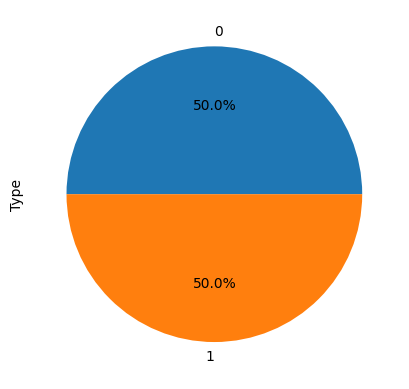

In [23]:
dataset_balanced = pd.concat([not_ROM_dataset, ROM_dataset], ignore_index=True)

print(dataset_balanced["class"].value_counts())

dataset_balanced.groupby('class').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

**Dataset Balanced!**

## Feature Engineering

In [24]:
dataset_balanced

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,0.017072,-0.647323,0.039466,0.999905,0.034883,-0.678245,0.065293,0.999884,0.035112,...,-0.110734,0.781042,-0.389782,0.691885,-0.259761,0.872790,-0.478664,0.676768,-0.210340,0.876410
1,0,-0.059794,-0.636997,-0.069864,0.999994,-0.067405,-0.669339,-0.090282,0.999994,-0.068017,...,0.226614,0.637911,0.021229,0.829626,0.215969,0.844359,0.121388,0.787295,0.321752,0.835470
2,0,0.087782,-0.645331,-0.044648,0.999928,0.071960,-0.680718,-0.044237,0.999867,0.071346,...,-0.055352,0.787749,0.093068,0.888435,0.083560,0.944906,0.108932,0.879291,-0.051602,0.955833
3,0,0.111092,-0.677303,-0.082133,0.999914,0.107678,-0.710497,-0.057824,0.999856,0.107746,...,0.061193,0.708432,0.077528,0.858870,0.034229,0.930519,-0.032952,0.870955,-0.040787,0.930790
4,0,0.022639,-0.625638,-0.041197,0.999974,0.006277,-0.659252,-0.036674,0.999956,0.005604,...,0.077114,0.697442,0.189663,0.837115,0.205920,0.875172,0.161919,0.851767,0.120728,0.882278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,1,-0.091234,-0.646106,-0.187156,0.999788,-0.085210,-0.672836,-0.171915,0.999716,-0.084610,...,0.189734,0.850941,0.052889,0.844991,-0.057309,0.867559,-0.222803,0.818937,0.136498,0.883068
4980,1,-0.021359,-0.639644,-0.208730,0.999760,-0.016665,-0.670279,-0.191817,0.999687,-0.016314,...,0.078406,0.832591,0.294938,0.820623,-0.025713,0.850175,-0.176191,0.843345,-0.025486,0.872223
4981,1,-0.003557,-0.623418,-0.263159,0.999753,0.008131,-0.657632,-0.244174,0.999679,0.008469,...,0.091679,0.827890,0.219792,0.839558,-0.004215,0.849745,-0.308565,0.829485,-0.021013,0.875095
4982,1,-0.191445,-0.639644,-0.085867,0.999760,-0.174451,-0.670279,-0.081476,0.999687,-0.173746,...,0.184173,0.832591,0.125201,0.820623,-0.268280,0.850175,-0.110167,0.843345,0.139843,0.872223


The output of the mediapipe consists of 33 coordinate points from head to toe. Each point will have 4 values, namely `X, Y, and Z` (For point coordinates) and `visibility` for the value of the point confidence.

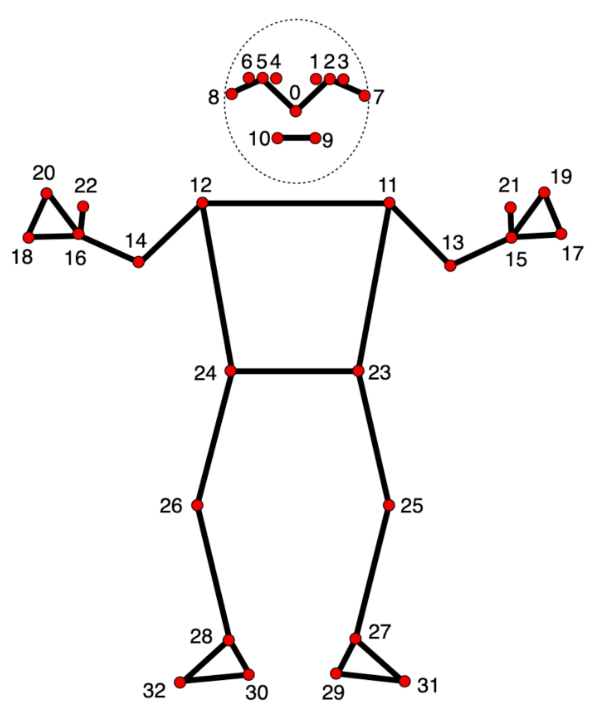

In [25]:
# see corelation map each data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataset_balanced.corr())

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,x11,y11,z11,v11,x12,y12,z12,v12,x13,y13,z13,v13,x14,y14,z14,v14,x15,y15,z15,v15,x16,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,x26,y26,z26,v26,x27,y27,z27,v27,x28,y28,z28,v28,x29,y29,z29,v29,x30,y30,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
class,1.000000,-0.014803,-0.019950,-0.088765,-0.270258,-0.025129,-0.037139,-0.100085,-0.265407,-0.025127,-0.038218,-0.100385,-0.253742,-0.025038,-0.037871,-0.100378,-0.270317,-0.013792,-0.026100,-0.101954,-0.265320,-0.013858,-0.024872,-0.101819,-0.250484,-0.013800,-0.025904,-0.101992,-0.271731,-0.035838,-0.117303,-0.122603,-0.234386,0.009091,-0.073728,-0.123098,-0.251987,-0.018393,-0.059120,-0.102589,-0.189642,-0.003576,-0.045812,-0.104361,-0.243755,-0.030040,-0.098411,-0.112911,-0.244467,0.018453,-0.147549,-0.111379,-0.267605,-0.066005,-0.010599,-0.093021,-0.243086,0.052178,0.022409,-0.075419,-0.199748,-0.038615,0.012992,-0.098750,-0.182360,0.023033,0.043778,-0.082547,-0.158032,-0.028188,0.010930,-0.096325,-0.130238,0.010243,0.041448,-0.080118,-0.084918,-0.021374,-0.002270,-0.104051,-0.104825,0.000880,0.024647,-0.092384,-0.069721,-0.033835,0.004794,-0.103341,-0.067360,0.017602,0.034329,-0.087282,-0.060190,-0.021098,0.169778,-0.009075,-0.182342,0.021091,-0.172026,0.008892,-0.129799,-0.046611,0.199967,0.065628,-0.036525,0.035885,0.171545,0.080230,0.046621,-0.019920,0.109266,0.082891,0.066976,0.013570,0.104984,0.098994,0.074405,-0.018824,0.102323,0.082435,0.085913,0.009422,0.102810,0.098532,0.069047,-0.028144,0.101609,0.074433,0.026043,0.000179,0.126578,0.090199,0.027897
x1,-0.014803,1.000000,0.024925,-0.001559,0.035244,0.986809,0.030690,0.020046,0.037237,0.986140,0.030796,0.021527,0.041302,0.986195,0.030806,0.021091,0.039822,0.962108,0.027199,-0.046701,0.036289,0.963701,0.026970,-0.046193,0.037609,0.962704,0.027211,-0.045892,0.036763,0.608377,0.046021,0.179054,0.044242,0.505991,0.031555,-0.137775,0.034602,0.953195,0.030738,0.069315,0.025359,0.960763,0.025798,-0.030145,0.030695,0.372758,0.050253,0.313706,0.047710,0.280657,0.043957,-0.215901,0.054752,0.394454,0.033631,0.342412,-0.028302,0.233309,0.040606,-0.296476,-0.019189,0.486730,0.033471,0.248552,-0.051584,0.344698,0.037359,-0.256939,-0.035091,0.525264,0.033589,0.218610,-0.049347,0.407096,0.037173,-0.238124,-0.036510,0.549877,0.036210,0.197986,-0.049816,0.407279,0.038574,-0.221753,-0.036486,0.506278,0.034901,0.234619,-0.055595,0.367829,0.037675,-0.241171,-0.040750,0.070331,0.054785,0.441207,0.042766,-0.074150,-0.054367,-0.440521,0.023424,-0.095908,-0.028408,0.153395,0.009182,-0.185520,-0.021638,-0.294440,-0.006197,-0.412459,-0.010373,0.137398,0.006960,-0.535901,-0.005911,-0.135492,-0.001180,-0.407441,-0.008824,0.138878,0.005432,-0.533971,-0.004691,-0.126010,0.001773,-0.192608,-0.006323,0.098434,0.012178,-0.279530,-0.006050,-0.168421,0.003320
y1,-0.019950,0.024925,1.000000,0.278762,0.179642,0.031371,0.993758,0.287932,0.207147,0.031401,0.993682,0.288330,0.202403,0.031317,0.993662,0.288595,0.217739,0.034425,0.995491,0.291333,0.201436,0.034280,0.995552,0.290799,0.197607,0.034076,0.995473,0.291422,0.213216,0.041314,0.899366,0.273294,0.183277,0.047426,0.927770,0.284350,0.196056,0.029526,0.990816,0.301036,0.099028,0.036023,0.993941,0.305877,0.133309,0.019715,0.793349,0.232253,0.296695,0.034074,0.749755,0.252543,0.289419,0.011024,0.559292,0.182774,-0.166864,0.020531,0.538507,0.203564,-0.250909,0.028722,0.521341,0.149614,-0.235875,0.008400,0.496722,0.173502,-0.269598,0.034765,0.519819,0.150492,-0.209960,0.009972,0.494719,0.176661,-0.297346,0.043941,0.516474,0.160480,-0.222908,0.003894,0.492815,0.178116,-0.295931,0.032398,0.519681,0.155979,-0.272872,0.006757,0.494513,0.176932,-0.321041,-0.002147,0.186644,-0.005062,0.225192,0.001993,-0.182707,0.004694,0.112017,0.013819,-0.216271,-0.186367,0.014192

Feature `v`s (`visibility`) have small correlation to class feature. So, we can drop them from the table. 

In [26]:
# Find all visibility columns
columns = dataset_balanced.columns
columns_to_drop = [column for column in columns if column.startswith('v')]
print(columns_to_drop)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33']


In [27]:
# Drop v columns
dataset_xyz = dataset_balanced.drop(columns=columns_to_drop, inplace=False)
dataset_xyz

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,0.017072,-0.647323,0.039466,0.034883,-0.678245,0.065293,0.035112,-0.678655,0.065986,...,-0.165744,-0.414396,0.674347,-0.110734,-0.389782,0.691885,-0.259761,-0.478664,0.676768,-0.210340
1,0,-0.059794,-0.636997,-0.069864,-0.067405,-0.669339,-0.090282,-0.068017,-0.669794,-0.090727,...,0.134065,0.139610,0.720700,0.226614,0.021229,0.829626,0.215969,0.121388,0.787295,0.321752
2,0,0.087782,-0.645331,-0.044648,0.071960,-0.680718,-0.044237,0.071346,-0.681115,-0.043644,...,0.080201,-0.005049,0.798843,-0.055352,0.093068,0.888435,0.083560,0.108932,0.879291,-0.051602
3,0,0.111092,-0.677303,-0.082133,0.107678,-0.710497,-0.057824,0.107746,-0.710979,-0.057268,...,0.152062,-0.080932,0.801299,0.061193,0.077528,0.858870,0.034229,-0.032952,0.870955,-0.040787
4,0,0.022639,-0.625638,-0.041197,0.006277,-0.659252,-0.036674,0.005604,-0.659855,-0.036183,...,0.149773,0.049551,0.797070,0.077114,0.189663,0.837115,0.205920,0.161919,0.851767,0.120728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,1,-0.091234,-0.646106,-0.187156,-0.085210,-0.672836,-0.171915,-0.084610,-0.673543,-0.171582,...,0.037987,-0.140139,0.773804,0.189734,0.052889,0.844991,-0.057309,-0.222803,0.818937,0.136498
4980,1,-0.021359,-0.639644,-0.208730,-0.016665,-0.670279,-0.191817,-0.016314,-0.670923,-0.191206,...,0.080310,-0.167397,0.793897,0.078406,0.294938,0.820623,-0.025713,-0.176191,0.843345,-0.025486
4981,1,-0.003557,-0.623418,-0.263159,0.008131,-0.657632,-0.244174,0.008469,-0.658242,-0.243549,...,0.107673,-0.257249,0.783772,0.091679,0.219792,0.839558,-0.004215,-0.308565,0.829485,-0.021013
4982,1,-0.191445,-0.639644,-0.085867,-0.174451,-0.670279,-0.081476,-0.173746,-0.670923,-0.081475,...,-0.182700,-0.015797,0.793897,0.184173,0.125201,0.820623,-0.268280,-0.110167,0.843345,0.139843


Now we only have dataset with XYZ coordinates

## Feature Selection

Because, we predict momentum while doing pull-ups, all coordinates are matter. So, we don't try to drop some columns.

In [28]:
# dataset xyz
dataset_xyz # complete dataset

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,0.017072,-0.647323,0.039466,0.034883,-0.678245,0.065293,0.035112,-0.678655,0.065986,...,-0.165744,-0.414396,0.674347,-0.110734,-0.389782,0.691885,-0.259761,-0.478664,0.676768,-0.210340
1,0,-0.059794,-0.636997,-0.069864,-0.067405,-0.669339,-0.090282,-0.068017,-0.669794,-0.090727,...,0.134065,0.139610,0.720700,0.226614,0.021229,0.829626,0.215969,0.121388,0.787295,0.321752
2,0,0.087782,-0.645331,-0.044648,0.071960,-0.680718,-0.044237,0.071346,-0.681115,-0.043644,...,0.080201,-0.005049,0.798843,-0.055352,0.093068,0.888435,0.083560,0.108932,0.879291,-0.051602
3,0,0.111092,-0.677303,-0.082133,0.107678,-0.710497,-0.057824,0.107746,-0.710979,-0.057268,...,0.152062,-0.080932,0.801299,0.061193,0.077528,0.858870,0.034229,-0.032952,0.870955,-0.040787
4,0,0.022639,-0.625638,-0.041197,0.006277,-0.659252,-0.036674,0.005604,-0.659855,-0.036183,...,0.149773,0.049551,0.797070,0.077114,0.189663,0.837115,0.205920,0.161919,0.851767,0.120728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,1,-0.091234,-0.646106,-0.187156,-0.085210,-0.672836,-0.171915,-0.084610,-0.673543,-0.171582,...,0.037987,-0.140139,0.773804,0.189734,0.052889,0.844991,-0.057309,-0.222803,0.818937,0.136498
4980,1,-0.021359,-0.639644,-0.208730,-0.016665,-0.670279,-0.191817,-0.016314,-0.670923,-0.191206,...,0.080310,-0.167397,0.793897,0.078406,0.294938,0.820623,-0.025713,-0.176191,0.843345,-0.025486
4981,1,-0.003557,-0.623418,-0.263159,0.008131,-0.657632,-0.244174,0.008469,-0.658242,-0.243549,...,0.107673,-0.257249,0.783772,0.091679,0.219792,0.839558,-0.004215,-0.308565,0.829485,-0.021013
4982,1,-0.191445,-0.639644,-0.085867,-0.174451,-0.670279,-0.081476,-0.173746,-0.670923,-0.081475,...,-0.182700,-0.015797,0.793897,0.184173,0.125201,0.820623,-0.268280,-0.110167,0.843345,0.139843


# Build Model

## Dataset XYZ

In [29]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xyz.iloc[:, 1:]
label = dataset_xyz.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.3, random_state=42, stratify=label)

In [30]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [32]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

2024-06-18 10:49:27.878130: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 10:49:27.878261: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 10:49:27.878313: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 10:49:28.139388: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 10:49:28.139461: I external/local_xla/xla/stream_executor

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 99)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,698 (92.57 KB)

 Trainable params: 23,698 (92.57 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100


I0000 00:00:1718682573.568718    3116 service.cc:145] XLA service 0x7fc8c40055b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718682573.568775    3116 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-06-18 10:49:33.634825: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-18 10:49:33.909318: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 61/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5597 - loss: 0.6886

I0000 00:00:1718682575.632454    3116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5937 - loss: 0.6753 - val_accuracy: 0.8316 - val_loss: 0.4847
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8388 - loss: 0.4327 - val_accuracy: 0.8168 - val_loss: 0.3822
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.3150 - val_accuracy: 0.8897 - val_loss: 0.2996
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8823 - loss: 0.2804 - val_accuracy: 0.9124 - val_loss: 0.2699
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9016 - loss: 0.2578 - val_accuracy: 0.8717 - val_loss: 0.3050
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8965 - loss: 0.2599 - val_accuracy: 0.9144 - val_loss: 0.2401
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9105 - loss: 0.2282 - val_accuracy: 0.8971 - val_loss: 0.2620
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9048 - loss: 0.2422 - val_accuracy: 0.897

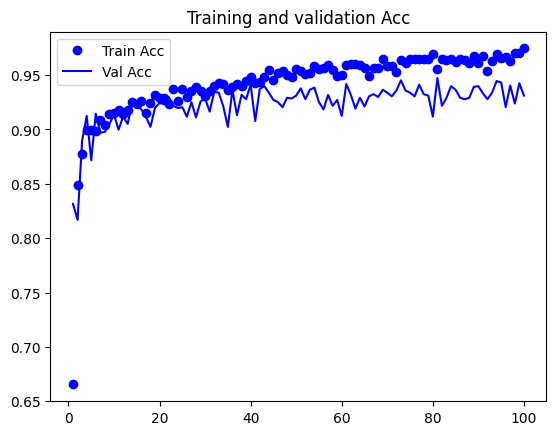

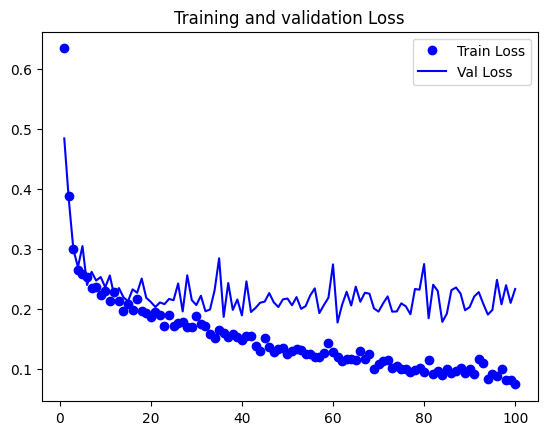

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [36]:
dir_path = '../model/xyz/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../model/xyz/assets


INFO:tensorflow:Assets written to: ../model/xyz/assets


## Dataset XYZ Elbows to Hands

In [49]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_hand
label = dataset_xyz.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [50]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [52]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,883 (58.14 KB)

 Trainable params: 14,883 (58.14 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.4663 - loss: 1.0031 - val_accuracy: 0.7679 - val_loss: 0.6075
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 0.5463 - val_accuracy: 0.8150 - val_loss: 0.4088
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8212 - loss: 0.4130 - val_accuracy: 0.8255 - val_loss: 0.4154
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8546 - loss: 0.3539 - val_accuracy: 0.8726 - val_loss: 0.3392
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.3380 - val_accuracy: 0.8883 - val_loss: 0.2974
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3089 - val_accuracy: 0.8691 - val_loss: 0.3259
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.2997 - val_accuracy: 0.8970 - val_loss: 0.2828
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9034 - loss: 0.2588 - val_accuracy: 0.9162 - 

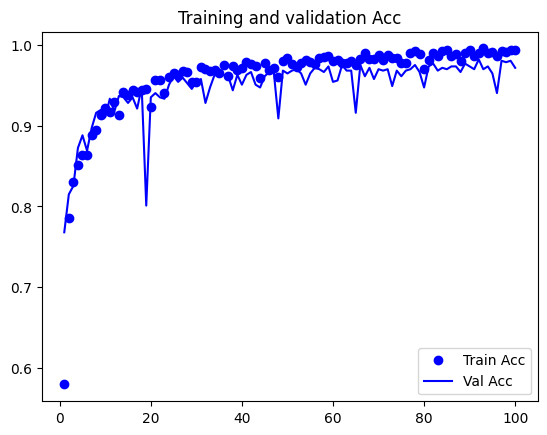

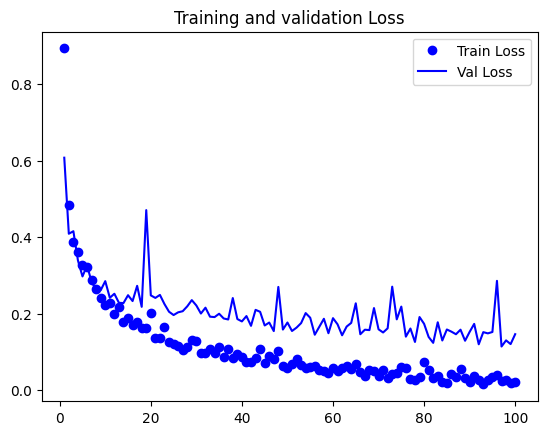

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [56]:
dir_path = '../Model/xyz_hand/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xyz_hand/assets


INFO:tensorflow:Assets written to: ../Model/xyz_hand/assets


## Dataset XY

In [67]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xy.iloc[:, 1:] 
label = dataset_xy.iloc[:, :1] 

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [68]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [70]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,491 (76.14 KB)

 Trainable params: 19,491 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.4185 - loss: 1.0889 - val_accuracy: 0.6754 - val_loss: 0.9759
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.8956 - val_accuracy: 0.7871 - val_loss: 0.6238
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 0.5753 - val_accuracy: 0.7522 - val_loss: 0.5070
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.4253 - val_accuracy: 0.8412 - val_loss: 0.4005
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.3823 - val_accuracy: 0.9092 - val_loss: 0.3144
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.3311 - val_accuracy: 0.8970 - val_loss: 0.2972
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8928 - loss: 0.2910 - val_accuracy: 0.8813 - val_loss: 0.3056
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2455 - val_accuracy: 0.9442 - 

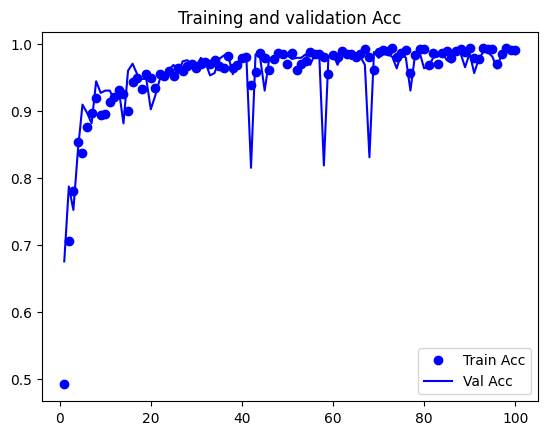

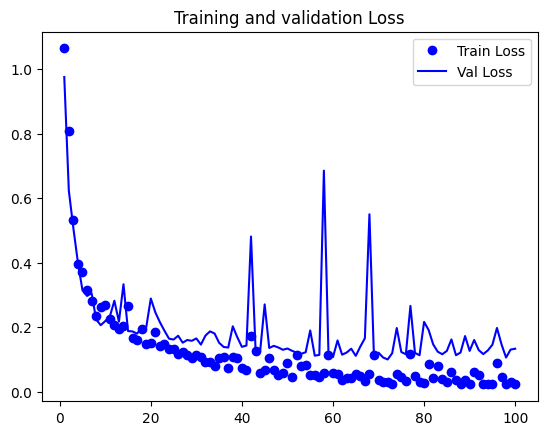

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [74]:
dir_path = '../Model/xy/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xy/assets


INFO:tensorflow:Assets written to: ../Model/xy/assets


## Dataset XY Elbows to Hands

In [78]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xy_hand
label = dataset_xy.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [79]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [81]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,603 (53.14 KB)

 Trainable params: 13,603 (53.14 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.4307 - loss: 1.0659 - val_accuracy: 0.5410 - val_loss: 0.8655
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.7400 - val_accuracy: 0.8290 - val_loss: 0.5142
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.4845 - val_accuracy: 0.8202 - val_loss: 0.4334
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.4228 - val_accuracy: 0.8010 - val_loss: 0.4290
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8146 - loss: 0.4063 - val_accuracy: 0.8691 - val_loss: 0.3702
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.3893 - val_accuracy: 0.8220 - val_loss: 0.3880
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8276 - loss: 0.3706 - val_accuracy: 0.8342 - val_loss: 0.3764
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8273 - loss: 0.3682 - val_accuracy: 0.7923 - 

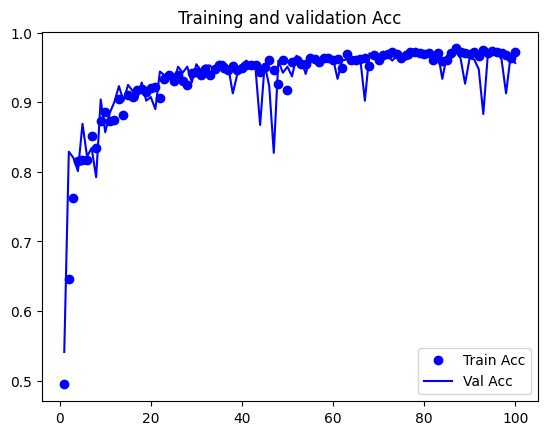

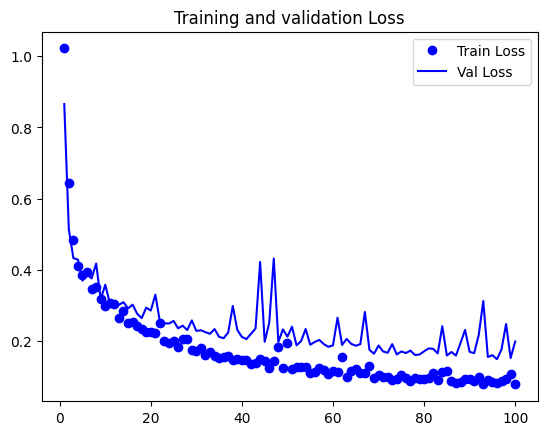

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [85]:
dir_path = '../Model/xy_hand/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xy_hand/assets


INFO:tensorflow:Assets written to: ../Model/xy_hand/assets
